<a href="https://colab.research.google.com/github/lucamedeir/QOSF_screening_test/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Task 2

Implement a circuit that returns |01> and |10> with equal probability.

Requirements :

->The circuit should consist only of CNOTs, RXs and RYs. 

->Start from all parameters in parametric gates being equal to 0 or randomly chosen. 

->You should find the right set of parameters using gradient descent (you can use more advanced optimization methods if you like).

->Simulations must be done with sampling - i.e. a limited number of measurements per iteration and noise. 

Compare the results for different numbers of measurements: 1, 10, 100, 1000. 

Bonus question:
How to make sure you produce state |01> + |10> and not |01> - |10> ?


### My understanding

we want to use gradient descent to find the right set of gate parameters which transforms the state |00> into $\frac{1}{\sqrt{2}}$(|01>+|10>)

Let's first find the right solution without gradient descent and no gate set limit

Any gate may be understood as a rotation of vector. The Bloch sphere is great tool to visualize the operations

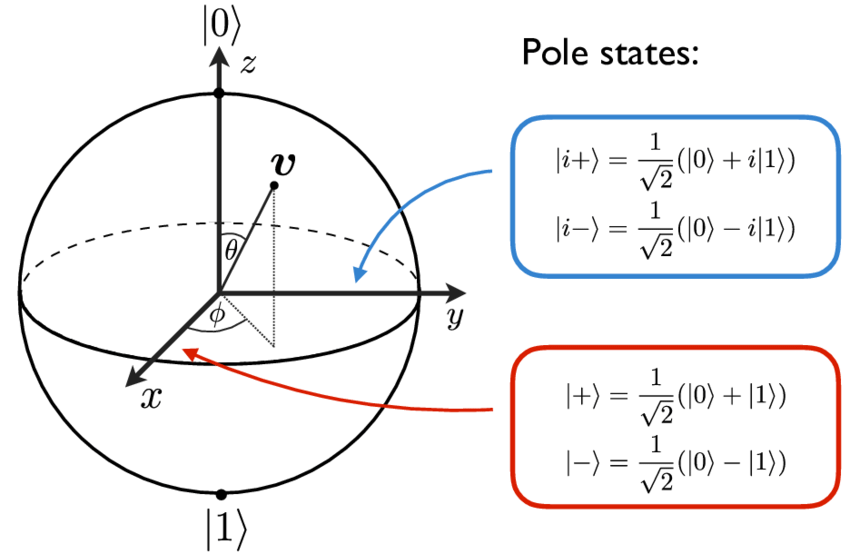

In [6]:
Image("img/bloch.png")

The solution can be achieved with following sequence of operations:

->apply a hadamard gate to the first qubit

->apply  cnot

->apply a X gate (a flip) to the second qubit


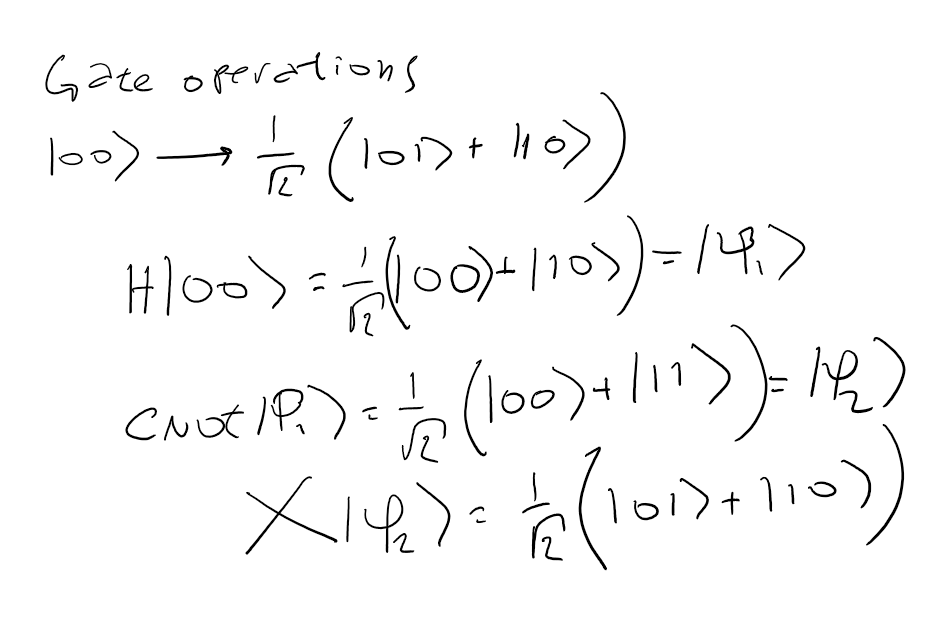

In [7]:
Image("img/operations.png")

However we are limited to CNOT, RX and RY. Not a problem because one may see from the bloch sphere the hadamard gate corresponds to RY($\pi$/2) and the X gate corresponds to RX($\pi$) (or RY($\pi$))

In [56]:
def get_polar_coordinates(v):
    a = v[0]
    b = v[1]
    
    theta = 0
    phi = 0
    
    theta = np.real(2*np.arccos(a))
        
    if np.abs(b) != 0:
        phi = np.real(-1j*np.log(b/np.sin(theta/2)))
        
    return (theta,phi)

def get_vector_coordinates(v):
    (theta,phi) = get_polar_coordinates(v)
    
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    
    return (x,y,z)

In [173]:
# Operators

I = np.array([[1,0],
              [0,1]],dtype=complex)

CNOT = np.array([[1,0,0,0],
                 [0,1,0,0],
                 [0,0,0,1],
                 [0,0,1,0]],dtype=complex)

special = np.array([[0,0,0,0],
                    [1,1,0,0],
                    [0,0,1,1],
                    [0,0,0,0]],dtype=complex)

def operator_RX(θ):
    rx = np.array([[np.cos(θ/2),-1j*np.sin(θ/2)],
                   [-1j*np.sin(θ/2),np.cos(θ/2)]],dtype=complex)
    return rx

def operator_RY(θ):
    ry = np.array([[np.cos(θ/2),np.sin(θ/2)],
                   [np.sin(θ/2),np.cos(θ/2)]],dtype=complex)
    return ry

RY1 = np.kron(operator_RY(np.pi/2),I)
RY2 = np.kron(I,operator_RY(np.pi/2))

In [174]:
ψ1 = np.array([1,0],dtype=complex)
ψ2 = np.array([1,0],dtype=complex)
initial_state = np.kron(ψ1,ψ2)

final_solution = np.array([0,1,1,0],dtype=complex)/np.sqrt(2)

In [175]:
circuit = special@CNOT@RY1

In [176]:
circuit@initial_state

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [177]:
final_solution

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [76]:
get_polar_coordinates(ψ0)

(0.0, 0)

In [77]:
get_vector_coordinates(ψ0)

(0.0, 0.0, 1.0)

In [178]:
RY2

array([[0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j],
       [0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j],
       [0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.70710678+0.j],
       [0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.70710678+0.j]])

In [181]:
np.sqrt(2)/2

0.7071067811865476